In [43]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import preprocessing
from sklearn.decomposition import PCA


In [44]:
%matplotlib inline

In [89]:
df = pd.read_csv("cereals.csv", na_values = -1).dropna()

In [90]:
#df.set_index("name")
#df.index = range(0,)
#for in in df.index:
    
    
df = df.reset_index()
df.tail()

,index,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
69,72,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75
70,73,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1.00
71,74,Wheat_Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67
72,75,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1.00
73,76,Wheaties_Honey_Gold,G,C,110,2,1,200,1,16,8,60,25,1,1,0.75


In [98]:
new_index = list(range(74))
pd.DataFrame(new_index)
#pd.DataFrame

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [74]:
df.rename(columns={'index': 'a'}, inplace=True)
df.head()
#df.drop([df.columns[[0,]]], axis=1)
#('a', axis=1, inplace=True)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75


In [5]:
pca = PCA(n_components =2)
pca.fit(df.iloc[:, 3:])
reduced_x = pca.transform(df.iloc[:, 3:])

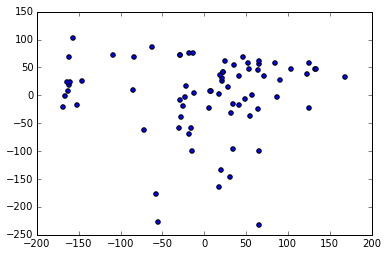

In [6]:
plt.scatter(reduced_x[:, 0], reduced_x[:, 1])

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(4)
y_pred = kmeans.fit_predict(reduced_x)

In [8]:
zip_list = list(zip(reduced_x, y_pred))

####I used 3, 4, 5, and 6 clusters but 4 looked like the most natural groupings to my eye.

#####Once, just for fun I plugged in 8 and I was supprised at how natural the groupings still looked.  This is an interesting tool.

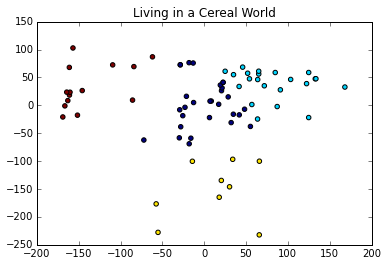

In [9]:
plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=y_pred, )
plt.title("Living in a Cereal World")
plt.show()

In [10]:
#holding_my_breath_ = pd.merge(df, y_pred)
#nope

In [11]:
#y_pred

In [12]:
zip_ = pd.DataFrame(zip_list)
zip_.head(2)

,0,1
0,"[-57.4496324545, -176.677344529]",2
1,"[-151.460814312, -17.6971815882]",3


In [13]:
df.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00


####I got close here, but there are 3 missing rows of data on the 

In [14]:
df.join(zip_).tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,0,1
72,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75,"[34.771261507, -15.9815163707]",0
73,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1.00,"[41.6433268933, 33.7346868995]",1
74,Wheat_Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67,NaN,NaN
75,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1.00,NaN,NaN
76,Wheaties_Honey_Gold,G,C,110,2,1,200,1,16,8,60,25,1,1,0.75,NaN,NaN


####Data, why you no match?


In [15]:
zip_.describe()

,1
count,74.000000
mean,1.108108
std,1.129524
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [16]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
72,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75
73,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1.00
74,Wheat_Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67
75,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1.00
76,Wheaties_Honey_Gold,G,C,110,2,1,200,1,16,8,60,25,1,1,0.75
